Logistic Regression - Gradient Descent
--
In this part you will build a logistic regression model using Numpy and doing gradient descent. 
You should complete the following cells (those with comments and no code). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read data
import pandas as pd
from sklearn.preprocessing import add_dummy_feature

data = pd.read_csv('https://raw.githubusercontent.com/thomouvic/SENG474/main/data/exams_admitted.csv')
print(data.head())

       exam1      exam2  admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1


In [3]:
# extract X and y from data
# use features 'exam1' and 'exam2' for X
# use feature 'admitted' for y
# use pandas.DataFrame.values to convert to numpy arrays
X = data[['exam1', 'exam2']].values
y = data[['admitted']].values

In [15]:
# normalize X
# use scikit-learn's built-in function MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [16]:
# add a dummy feature for the intercept
# use scikit-learn's built-in function add_dummy_feature
from sklearn.preprocessing import add_dummy_feature

X = add_dummy_feature(X)

In [18]:
# set m (number of training examples) and n (number of features)
# use the shape attribute of X
m, n = X.shape[0], X.shape[1] - 1

100


In [120]:
# initialize theta to zeros
theta=np.zeros((n+1,1))

In [121]:
# define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# test your sigmoid function on the value 0, should return 0.5
value = 0
result = sigmoid(value)
print(result)

0.5


In [124]:
# create a hypothesis function called h that takes in: 
# theta, an instance x, and returns the hypothesis
# the hypothesis is the sigmoid of x@theta
# use the @ operator for matrix multiplication
def h(theta, x):
    z = x @ theta
    hypothesis = sigmoid(z)
    return hypothesis

# test your hypothesis function on the first instance of X, should return [[0.5]]
hypothesis = h(theta, X[0])
print(hypothesis)

# the above function is vectorized
# for example, if instead of a single instance x, we have a matrix X of shape (m,n)
# then the hypothesis is a vector of shape (m,1) 
# where each element is the hypothesis for the corresponding row of X
# test it on the first 5 instances of X, should return an array of 0.5's
hypothesis = h(theta, X[:5])
print(hypothesis)

[0.5]
[[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]]


In [125]:
# create a function called J that takes in theta, X, y, and returns the cost
# the cost is the average of the log loss over the training examples
# the log loss for a single example is -y*log(h(theta,x))-(1-y)*log(1-h(theta,x))
# the cost is the average of the log loss over the training examples
# use the np.mean function to compute the average
# use the np.log function to compute the log
# use the @ operator to compute matrix multiplication
# use a vectorized implementation, do not use a for loop over the training examples
# use the hypothesis function h defined above
def J(theta, X, y):
    m = len(y)
    h_theta = h(theta, X)
    cost = -y * np.log(h_theta) - (1 - y) * np.log(1 - h_theta)
    total_cost = np.mean(cost)
    return total_cost

# test your cost function on the initial all-zero theta, should return 0.6931471805599453
cost = J(theta, X, y)
print(cost)

0.6931471805599453


In [126]:
# create a function called gradient that takes in theta, X, y, and returns the gradient
# the gradient is the average of the gradient over the training examples
# use the hypothesis function h defined above
# use a vectorized implementation, do not use a for loop over the training examples
# use the @ operator to compute matrix multiplication
# use the np.mean function to compute the average
# use the formula for the gradient given in the lecture
# the vectorized formula is X.T@(h(theta,X)-y)/m
def gradient(theta, X, y):
    m = len(y)
    h_theta = h(theta, X)
    gradient = X.T @ (h_theta - y) / m
    return gradient


# test your gradient function on the initial theta 
grad = gradient(theta, X, y)
print(grad)

[[-0.1       ]
 [ 0.        ]
 [-0.12904484]
 [-0.12015491]]


In [127]:
# create a function called 'fit' that takes in: 
# X, y, alpha, num_iters, initial theta, 
# and returns: final theta, and J_history
# inside the function:
# initialize theta to the initial theta
# initialize J_history to an empty list
# for each iteration, using a for loop over num_iters:
# update theta by subtracting alpha times the gradient (using the gradient function defined above)
# compute the cost J using the cost function defined above and append it to J_history
# return final theta, and J_history
def fit(X, y, alpha, num_iters, initial_theta):
    theta = initial_theta
    J_history = []
    
    for _ in range(num_iters):
        grad = gradient(theta, X, y)
        theta -= alpha * grad
        cost = J(theta, X, y)
        J_history.append(cost)
    
    return theta, J_history


# create a function called predict that takes in: 
# theta, and an array X_new of instances, 
# and returns the predictions
# threshold the hypothesis at 0.5
# use the hypothesis function h defined above
def predict(theta, X_new):
    h_theta = h(theta, X_new)
    predictions = (h_theta >= 0.5).astype(int)
    return predictions

Text(0, 0.5, 'J')

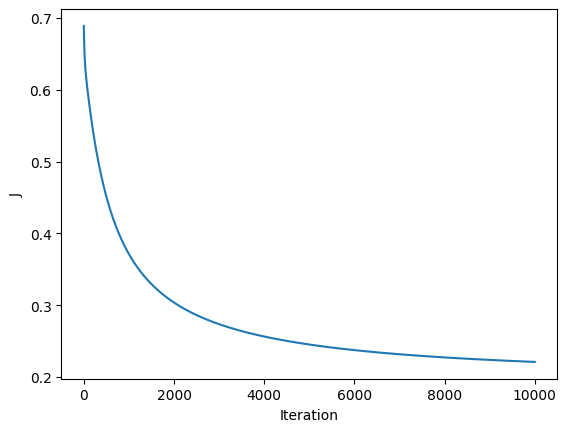

In [130]:
# call fit() with the following arguments:
# X, y, alpha=0.1, num_iters=10000, initial_theta=np.zeros((n,1))
# store the returned values in theta, J_history
# uncomment the following line to call fit()

theta, J_history = fit(X, y, alpha=0.1, num_iters=10000, initial_theta=np.zeros((n+1,1)))

# plot the cost over the iterations stored in J_history
# you should see the cost decreasing
# uncomment the following lines to plot the cost

plt.plot(J_history)
plt.xlabel('Iteration')
plt.ylabel('J')

In [131]:
# plot the data points
# use a scatter plot
# use the first feature for the x-axis, the second feature for the y-axis
# use the actual labels for the color, c=y[:,0]
# uncomment the following line to plot the data points
# plt.scatter(X[:,1],X[:,2],c=y[:,0])


# plot the decision boundary
# the decision boundary is the line where the hypothesis is 0.5
# the hypothesis is 0.5 when x@theta=0
# so the decision boundary is the line where x@theta=0
# this is a line in the x1,x2 plane

# for plotting the decision boundary, we need two points
# create two x1 values, say 0 and 1 (since we scaled to [0,1])
# then calculate the corresponding x2 values 
# using the decision boundary equation
# uncomment the following lines to plot the decision boundary
# two_x1 = np.array([0, 1])
# two_x2 = -(theta[0] + theta[1] * two_x1) / theta[2]

# plot the decision boundary as a k-- line. k-- is black dashed line
# plt.plot(two_x1, two_x2, "k--", linewidth=3)